<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/ML-journey/blob/main/K-Means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing the Dataset

In [ ]:
dataset=pd.read_csv('CC_GENERAL.csv')
dataset=dataset.drop(columns=['CUST_ID'])
X=dataset.iloc[:,:].values

In [ ]:
print(dataset.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

# Checking for missing Values

In [ ]:
column_X=dataset.columns
column_index=[]

for cols in column_X:
  missing_values=dataset[cols].isnull().sum()
  if missing_values>0:
    column_index.append({'column ':cols,
                         'index':dataset.columns.get_loc(cols)})

col_ind_len=len(column_index)

for i in column_index:
  print(i)


{'column ': 'CREDIT_LIMIT', 'index': 12}
{'column ': 'MINIMUM_PAYMENTS', 'index': 14}


# Handling missing data

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,[12]]=imputer.fit_transform(X[:,[12]])
X[:,[14]]=imputer.fit_transform(X[:,[14]])

# Applying Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
print(X)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]


# Applying the Elbow method with K Means++ to see the ideal number of clusters

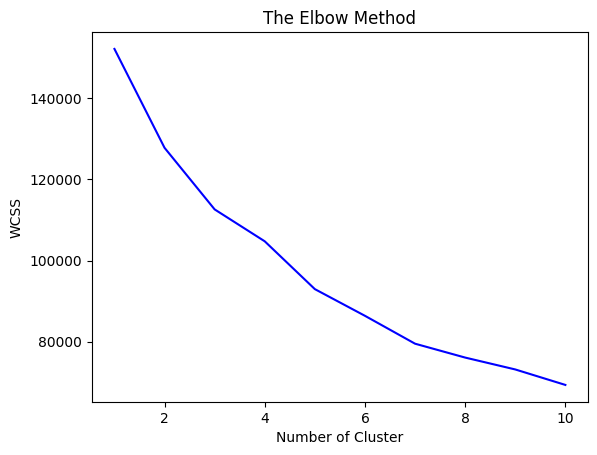

In [ ]:

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,color='blue')
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

# Training & prediction with 5 clusters

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++')
y_kmeans=kmeans.fit_predict(X)

In [ ]:

dataset['Cluster']=y_kmeans
print(dataset.groupby('Cluster').mean())

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         953.565397           0.941645  1346.867706        660.727311   
1        1067.747976           0.804013   277.709811        210.316066   
2        3775.129137           0.986701  8285.264714       5525.259657   
3         811.747721           0.771192   410.823944        258.842496   
4        4823.435957           0.973548   505.418416        315.686179   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    686.329783    210.706481             0.893147   
1                     67.687594    571.068813             0.178168   
2                   2761.719343    712.445133             0.944290   
3                    152.424579   1028.450202             0.414191   
4                    189.826990   4692.111709             0.2

# Visualising our result

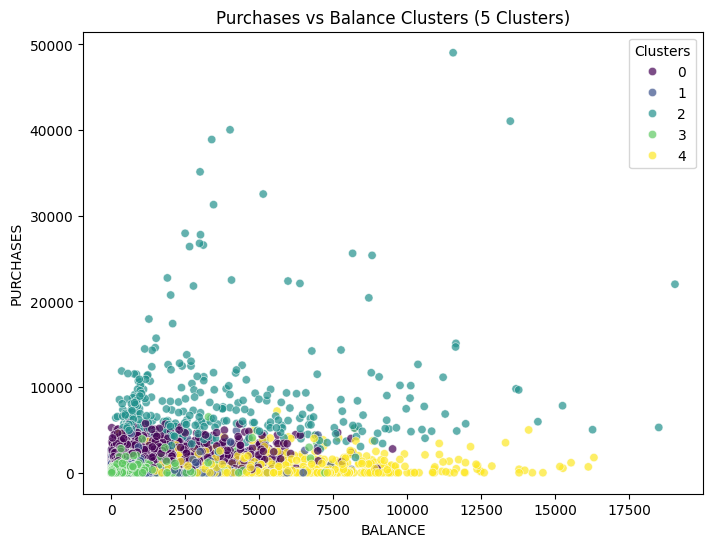

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=dataset,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster',
    palette='viridis',
    alpha=0.7
)

plt.title("Purchases vs Balance Clusters (5 Clusters)")
plt.legend(title='Clusters')
plt.show()

In [ ]:
kmeans_2=KMeans(n_clusters=4,init='k-means++')
y_kmeans_2=kmeans_2.fit_predict(X)

In [ ]:
print(y_kmeans_2)

[3 2 1 ... 0 3 0]


In [ ]:
dataset['Cluster2']=y_kmeans_2
print(dataset.groupby('Cluster2').mean())

              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster2                                                                  
0          108.430006           0.412096   350.247868        190.521089   
1         1253.817942           0.974758  2182.022178       1241.768493   
2         5010.394668           0.966663   716.017789        450.235875   
3         1495.324927           0.966467   283.482824        210.004454   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster2                                                              
0                     160.197189    299.482324             0.320591   
1                     940.517248    234.564524             0.928413   
2                     265.885977   5065.974690             0.327150   
3                      73.794186    782.285268             0.207097   

          ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster2                                        

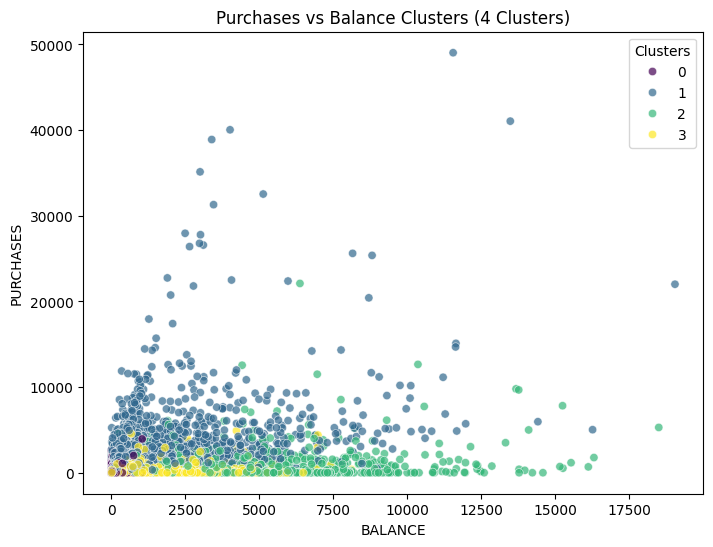

In [ ]:
import seaborn as sns
dataset=dataset.drop(columns='Cluster')
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=dataset,
    x='BALANCE',
    y='PURCHASES',
    hue='Cluster2',
    palette='viridis',
    alpha=0.7
)

plt.title("Purchases vs Balance Clusters (4 Clusters)")
plt.legend(title='Clusters')
plt.show()